# Batch Normalization

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs

In [24]:
X, y = make_circles(n_samples=500, factor=0.83, noise=0.09)


<Axes: >

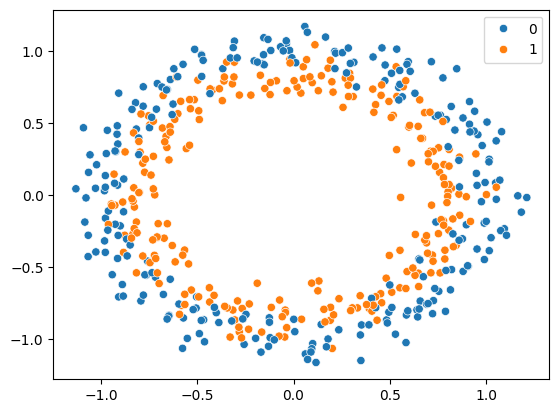

In [25]:
import seaborn as sns
sns.scatterplot(x =X[:,0],y =X[:,1],hue=y)

In [26]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [30]:
#   Without Batch Noramlization
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model.fit(X,y,epochs=200,validation_split=0.2,verbose=False)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))

model.add(BatchNormalization()) # batch normalization

model.add(Dense(2,activation='relu'))

model.add(BatchNormalization())# batch normalization

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 23 (92.00 B)

 Non-trainable params: 8 (32.00 B)

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model.fit(X,y,epochs=200,validation_split=0.2,verbose =False)

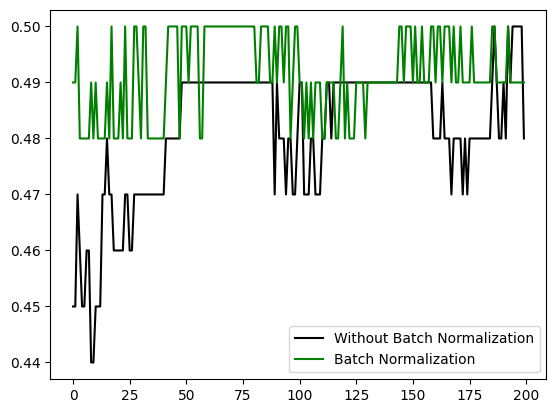

In [32]:
plt.plot(history1.history['val_accuracy'],color='black' ,label ="Without Batch Normalization")
plt.plot(history2.history['val_accuracy'],color='green',label ="Batch Normalization")
plt.legend()
plt.show()
